In [34]:
from PIL import Image
import torch
import os
import numpy as np
from matplotlib import pyplot as plt
from models.Resnet50_model import Feature_Extractor
from torchvision import transforms

In [35]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Feature_Extractor()
model = model.to(device=device)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((224,224))])


In [36]:
def get_reference_image(inference_folder_path):
    """Returns the first image in the given folder"""
    images = os.listdir(inference_folder_path)
    image = images[0]
    image_path = os.path.join(inference_folder_path, image)
    image = Image.open(image_path)
    return image

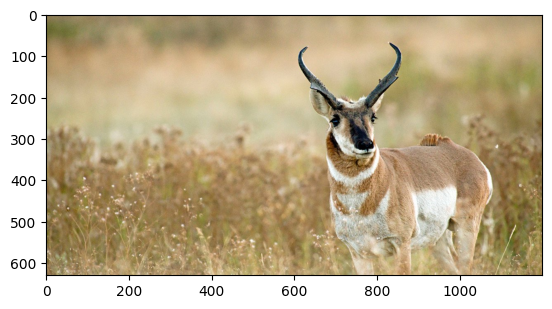

In [37]:
inference_image = get_reference_image(inference_folder_path='./inference_image/')
plt.imshow(np.asarray(inference_image))

In [38]:
reference_dataset_folder_path = './data/animals/animals'

In [39]:
reference_classes = os.listdir(reference_dataset_folder_path)
print(reference_classes)

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


In [40]:
def inference_for_pair(inference_image, reference_image):
    inference_image = transform(inference_image)
    reference_image = transform(reference_image)
    
    inference_image = torch.unsqueeze(inference_image, 0).to(device)
    reference_image = torch.unsqueeze(reference_image, 0).to(device)
    similarity = model(image1= inference_image, image2 = reference_image)
    return similarity

In [41]:
def compare_with_other_classes(inference_image, reference_dataset_folder_path):
    reference_classes = os.listdir(reference_dataset_folder_path)
    for reference_class in reference_classes:
        calss_path = os.path.join(reference_dataset_folder_path, reference_class)
        class_images = os.listdir(calss_path)
        class_similarities = []
        for class_image_name in class_images:
            class_image_path = os.path.join(calss_path, class_image_name)
            image = Image.open(class_image_path)
            similarity = inference_for_pair(inference_image= inference_image, reference_image= image).mean()
            print(f"class {reference_class}, similarity = {similarity}")

                      

In [42]:
reference_image= Image.open('data/animals/animals/bee/0d562e4829.jpg')

In [43]:
sim = inference_for_pair(inference_image=inference_image, reference_image= reference_image)
print(sim.mean())

tensor(0.9365)


In [33]:
compare_with_other_classes(inference_image=inference_image, reference_dataset_folder_path= reference_dataset_folder_path)

class antelope, similarity = 0.9920061230659485
class antelope, similarity = 0.9692326784133911
class antelope, similarity = 0.9622162580490112
class antelope, similarity = 1.0
class antelope, similarity = 0.9855016469955444
class antelope, similarity = 0.9935491681098938
class antelope, similarity = 0.9837693572044373
class antelope, similarity = 0.9893052577972412
class antelope, similarity = 0.989975094795227
class antelope, similarity = 0.9847571849822998
class antelope, similarity = 0.9884507656097412
class antelope, similarity = 0.9848270416259766
class antelope, similarity = 0.9910871982574463
class antelope, similarity = 0.9875929355621338
class antelope, similarity = 0.9800760746002197
class antelope, similarity = 0.9732791185379028
class antelope, similarity = 0.9849526882171631
class antelope, similarity = 0.9831196069717407
class antelope, similarity = 0.9923371076583862
class antelope, similarity = 0.9942629337310791
class antelope, similarity = 0.9174022674560547
class an